In [1]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [2]:
!apt-get install -y pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-luatex pandoc-citeproc context wkhtmltopdf librsvg2-bin groff ghc nodejs php python
  libjs-mathjax libjs-katex citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 29 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pandoc-

In [9]:
!jupyter nbconvert --to pdf /rf.ipynb

[NbConvertApp] WARNING | pattern '/rf.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, precision_score, accuracy_score,recall_score

In [ ]:
df=pd.read_csv('bank-train.csv',delimiter=';')
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,100,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,101,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,102,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,103,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,104,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
df.info()
print('Data shape :',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         40000 non-null  int64 
 1   age        40000 non-null  int64 
 2   job        40000 non-null  object
 3   marital    40000 non-null  object
 4   education  40000 non-null  object
 5   default    40000 non-null  object
 6   balance    40000 non-null  int64 
 7   housing    40000 non-null  object
 8   loan       40000 non-null  object
 9   contact    40000 non-null  object
 10  day        40000 non-null  int64 
 11  month      40000 non-null  object
 12  duration   40000 non-null  int64 
 13  campaign   40000 non-null  int64 
 14  pdays      40000 non-null  int64 
 15  previous   40000 non-null  int64 
 16  poutcome   40000 non-null  object
 17  y          40000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 5.5+ MB
Data shape : (40000, 18)


Some numerical features and some categorical features with y as the target variable

In [ ]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,20099.50000,40.544600,1274.277550,16.017225,254.824300,2.882175,31.956075,0.417550,0.072400
std,11547.14972,9.641776,2903.769716,8.278127,259.366498,3.239051,91.061625,2.146128,0.259152
min,100.00000,19.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,10099.75000,33.000000,54.000000,8.000000,100.000000,1.000000,-1.000000,0.000000,0.000000
50%,20099.50000,39.000000,407.000000,17.000000,175.000000,2.000000,-1.000000,0.000000,0.000000
75%,30099.25000,48.000000,1319.000000,21.000000,313.000000,3.000000,-1.000000,0.000000,0.000000
max,40099.00000,95.000000,102127.000000,31.000000,4918.000000,63.000000,385.000000,275.000000,1.000000


In [ ]:
df.duplicated().sum()

0

**No** duplicated value or missing value based on the info

In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

id: 40000 distinct values
age: 70 distinct values
job: 12 distinct values
marital: 3 distinct values
education: 4 distinct values
default: 2 distinct values
balance: 6849 distinct values
housing: 2 distinct values
loan: 2 distinct values
contact: 3 distinct values
day: 31 distinct values
month: 11 distinct values
duration: 1535 distinct values
campaign: 48 distinct values
pdays: 359 distinct values
previous: 37 distinct values
poutcome: 4 distinct values
y: 2 distinct values


In [ ]:
df.drop(columns='id',inplace=True)

<ipython-input-8-3949395cdc01>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='y',data=df,palette='viridis')


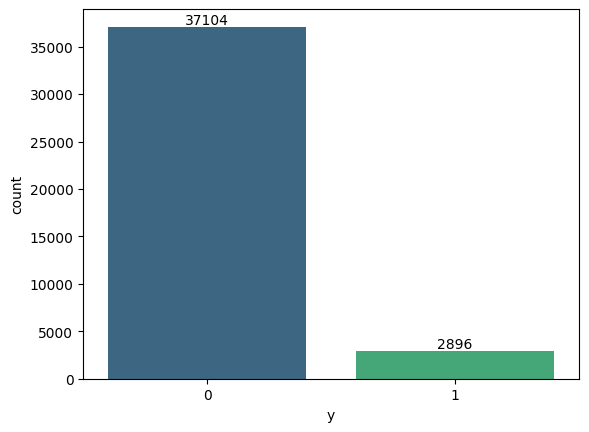

In [ ]:
ax=sns.countplot(x='y',data=df,palette='viridis')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 5, f'{int(p.get_height())}',
            ha='center', va='bottom', fontsize=10)

Data is **imbalanced** for the target variable

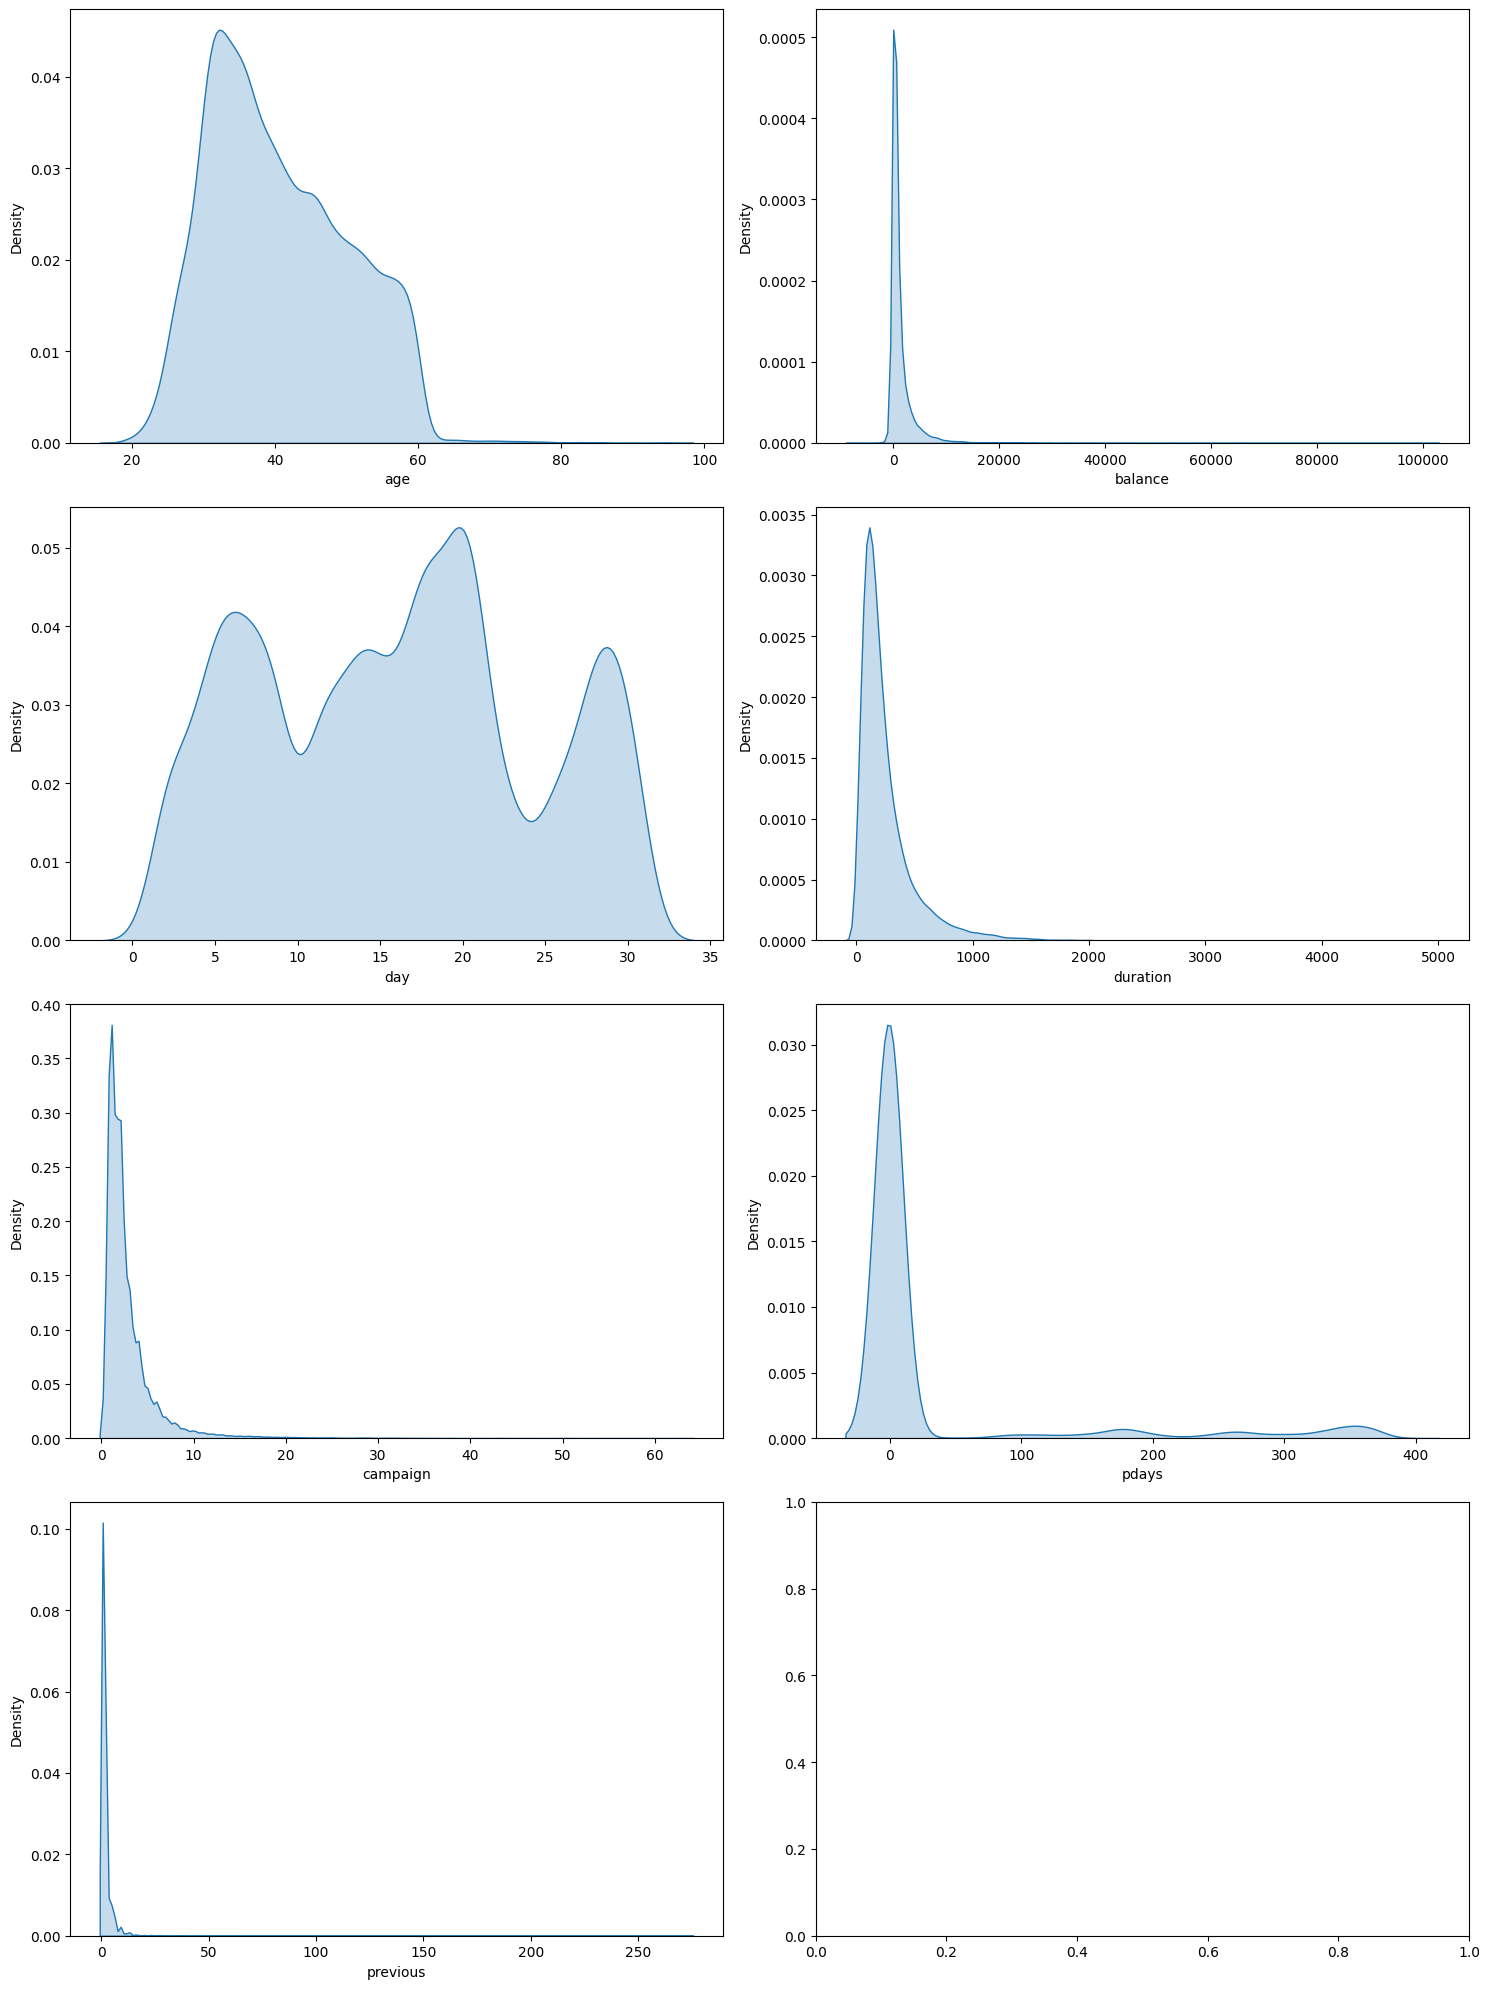

In [ ]:
fig,axes=plt.subplots(4,2,figsize=(15,20))
sns.kdeplot(ax=axes[0,0],x=df['age'],fill=True)
sns.kdeplot(ax=axes[0,1],x=df['balance'],fill=True)
sns.kdeplot(ax=axes[1,0],x=df['day'],fill=True)
sns.kdeplot(ax=axes[1,1],x=df['duration'],fill=True)
sns.kdeplot(ax=axes[2,0],x=df['campaign'],fill=True)
sns.kdeplot(ax=axes[2,1],x=df['pdays'],fill=True)
sns.kdeplot(ax=axes[3,0],x=df['previous'],fill=True)
plt.tight_layout()
plt.show()

In [ ]:
num_col=['age','balance','day','duration','campaign','pdays','previous','y']

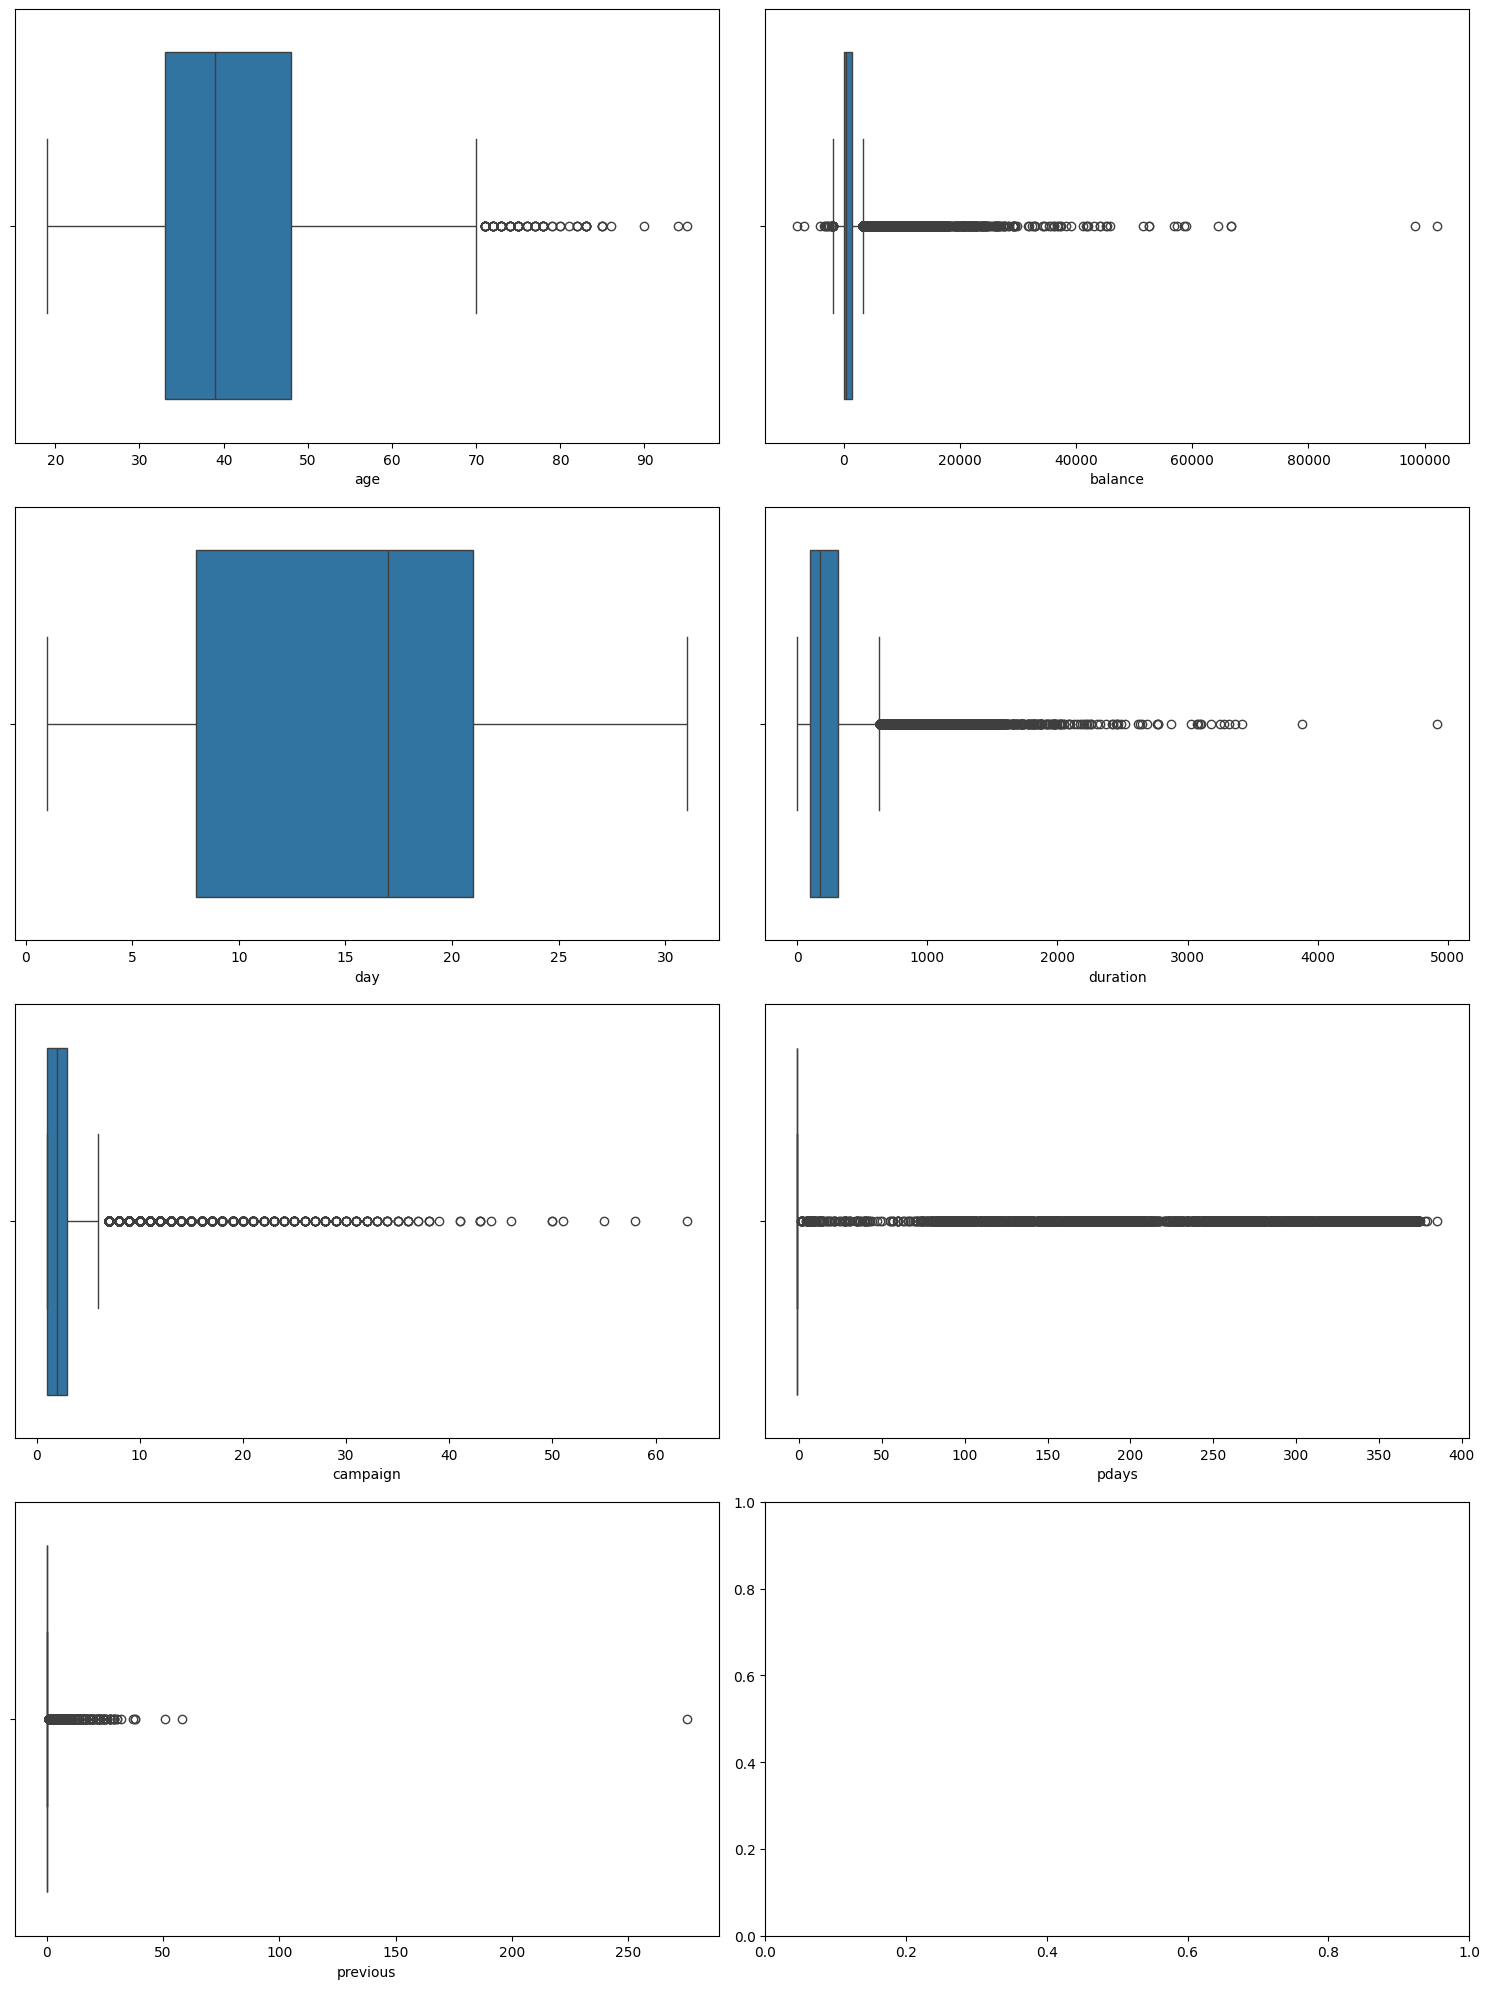

In [ ]:
fig,axes=plt.subplots(4,2,figsize=(15,20))
sns.boxplot(ax=axes[0,0],x=df['age'])
sns.boxplot(ax=axes[0,1],x=df['balance'])
sns.boxplot(ax=axes[1,0],x=df['day'])
sns.boxplot(ax=axes[1,1],x=df['duration'])
sns.boxplot(ax=axes[2,0],x=df['campaign'])
sns.boxplot(ax=axes[2,1],x=df['pdays'])
sns.boxplot(ax=axes[3,0],x=df['previous'])
plt.tight_layout()
plt.show()

There are **outliers** in the dataset

<ipython-input-12-00df47b29e85>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  job.set_xticklabels(job.get_xticklabels(), rotation = 45)


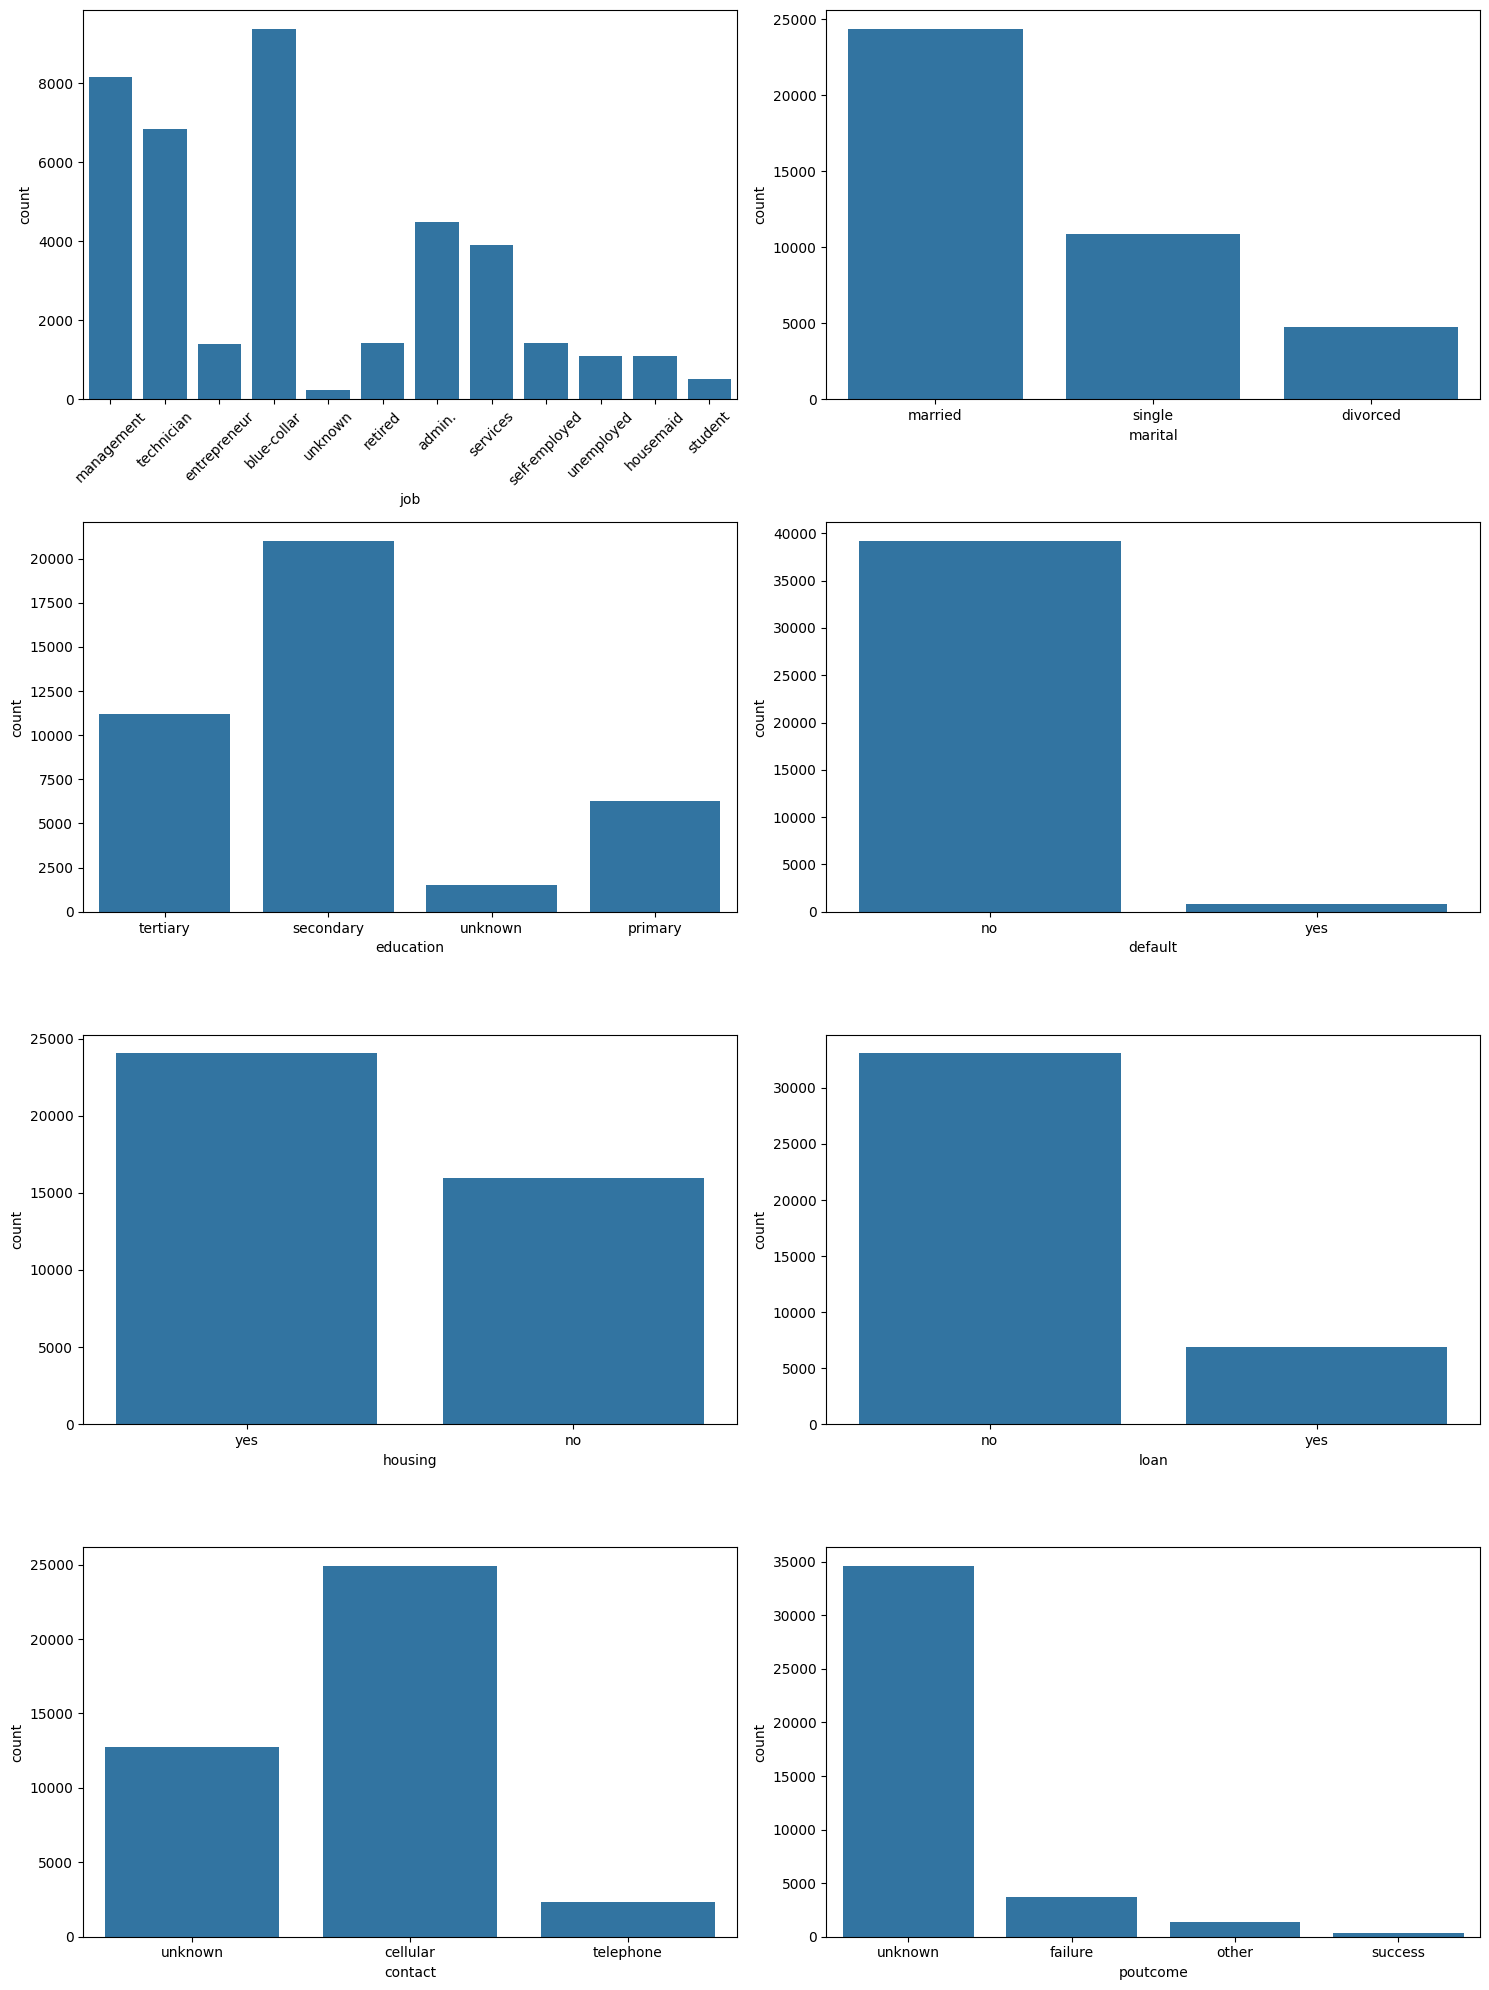

In [ ]:
fig,axes=plt.subplots(4,2,figsize=(15,20))
job=sns.countplot(ax=axes[0,0],x=df['job'])
job.set_xticklabels(job.get_xticklabels(), rotation = 45)
sns.countplot(ax=axes[0,1],x=df['marital'])
sns.countplot(ax=axes[1,0],x=df['education'])
#sns.countplot(ax=axes[1,0],x=df['education'],hue=df['y'],palette='viridis')
sns.countplot(ax=axes[1,1],x=df['default'])
sns.countplot(ax=axes[2,0],x=df['housing'])
sns.countplot(ax=axes[2,1],x=df['loan'])
sns.countplot(ax=axes[3,0],x=df['contact'])
sns.countplot(ax=axes[3,1],x=df['poutcome'])
plt.tight_layout()
plt.show()

Graph shows that the majority of the clients:
*   blue-collar, managements, and adminds
*   married status
*   have houses with no loans
*   no dafault
*   secondary education
*   have cellulars
*   unknown poutcome




Since majority of the clients choose to not subscribe we can also conclude based on the graph that those who choose to not subscribe have the charateristics above.

**Outlier removal** on balanced, previous, and duration columns (not alll only the most extreme one)

In [ ]:
df=df[~((df['previous']>50)| (df['balance']> 80000)| (df['duration']> 3600))]

In [ ]:
df_1=df.copy()
df_1.shape

(39993, 17)

In [ ]:
df_1[df_1['job']=='retired']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
15,51,retired,married,primary,no,229,yes,no,unknown,5,may,353,1,-1,0,unknown,0
18,60,retired,married,primary,no,60,yes,no,unknown,5,may,219,1,-1,0,unknown,0
24,40,retired,married,primary,no,0,yes,yes,unknown,5,may,181,1,-1,0,unknown,0
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39805,52,retired,married,primary,no,1629,no,no,telephone,1,jun,192,1,-1,0,unknown,0
39825,57,retired,divorced,primary,no,698,no,no,telephone,1,jun,53,2,-1,0,unknown,0
39904,60,retired,married,primary,no,1906,no,no,telephone,2,jun,79,1,60,2,other,0
39950,56,retired,married,secondary,no,0,no,no,cellular,2,jun,71,3,-1,0,unknown,0


In [ ]:
encoder=LabelEncoder()
df_1['job']=encoder.fit_transform(df_1['job'])
mapping_1=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
df_1['marital']=encoder.fit_transform(df_1['marital'])
mapping_2=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
df_1['education']=encoder.fit_transform(df_1['education'])
mapping_3=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
df_1['default']=encoder.fit_transform(df_1['default'])
mapping_4=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
df_1['housing']=encoder.fit_transform(df_1['housing'])
mapping_5=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
df_1['loan']=encoder.fit_transform(df_1['loan'])
mapping_6=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
df_1['contact']=encoder.fit_transform(df_1['contact'])
mapping_7=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
df_1['month']=encoder.fit_transform(df_1['month'])
mapping_8=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
df_1['poutcome']=encoder.fit_transform(df_1['poutcome'])
mapping_9=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))

<function matplotlib.pyplot.show(close=None, block=None)>

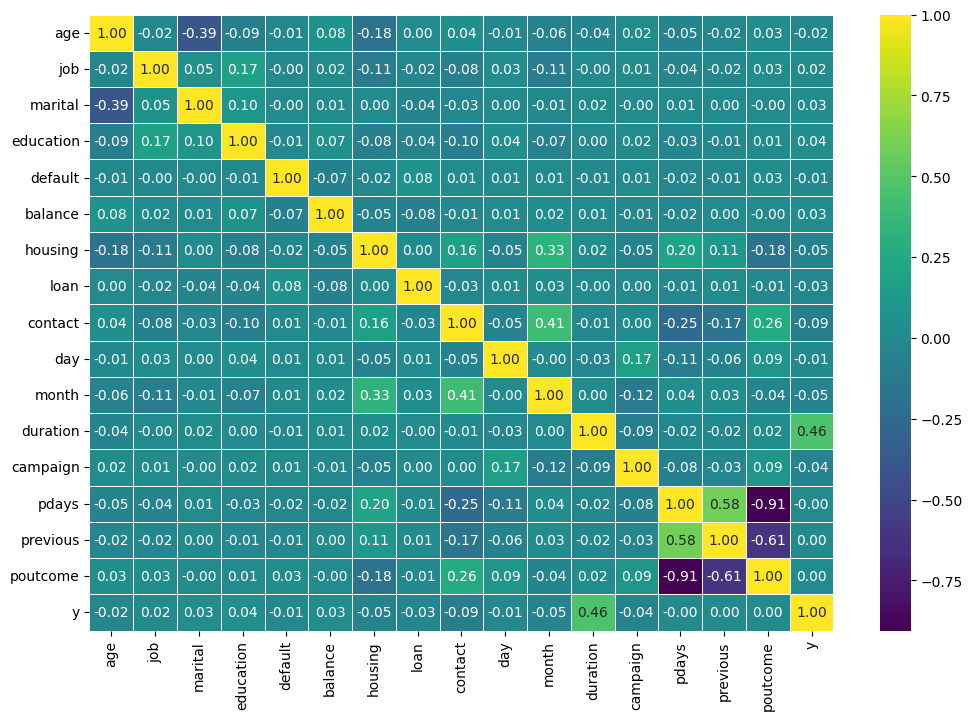

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_1.corr(),annot=True,fmt=".2f", cmap="viridis", linewidths=0.5)
plt.show

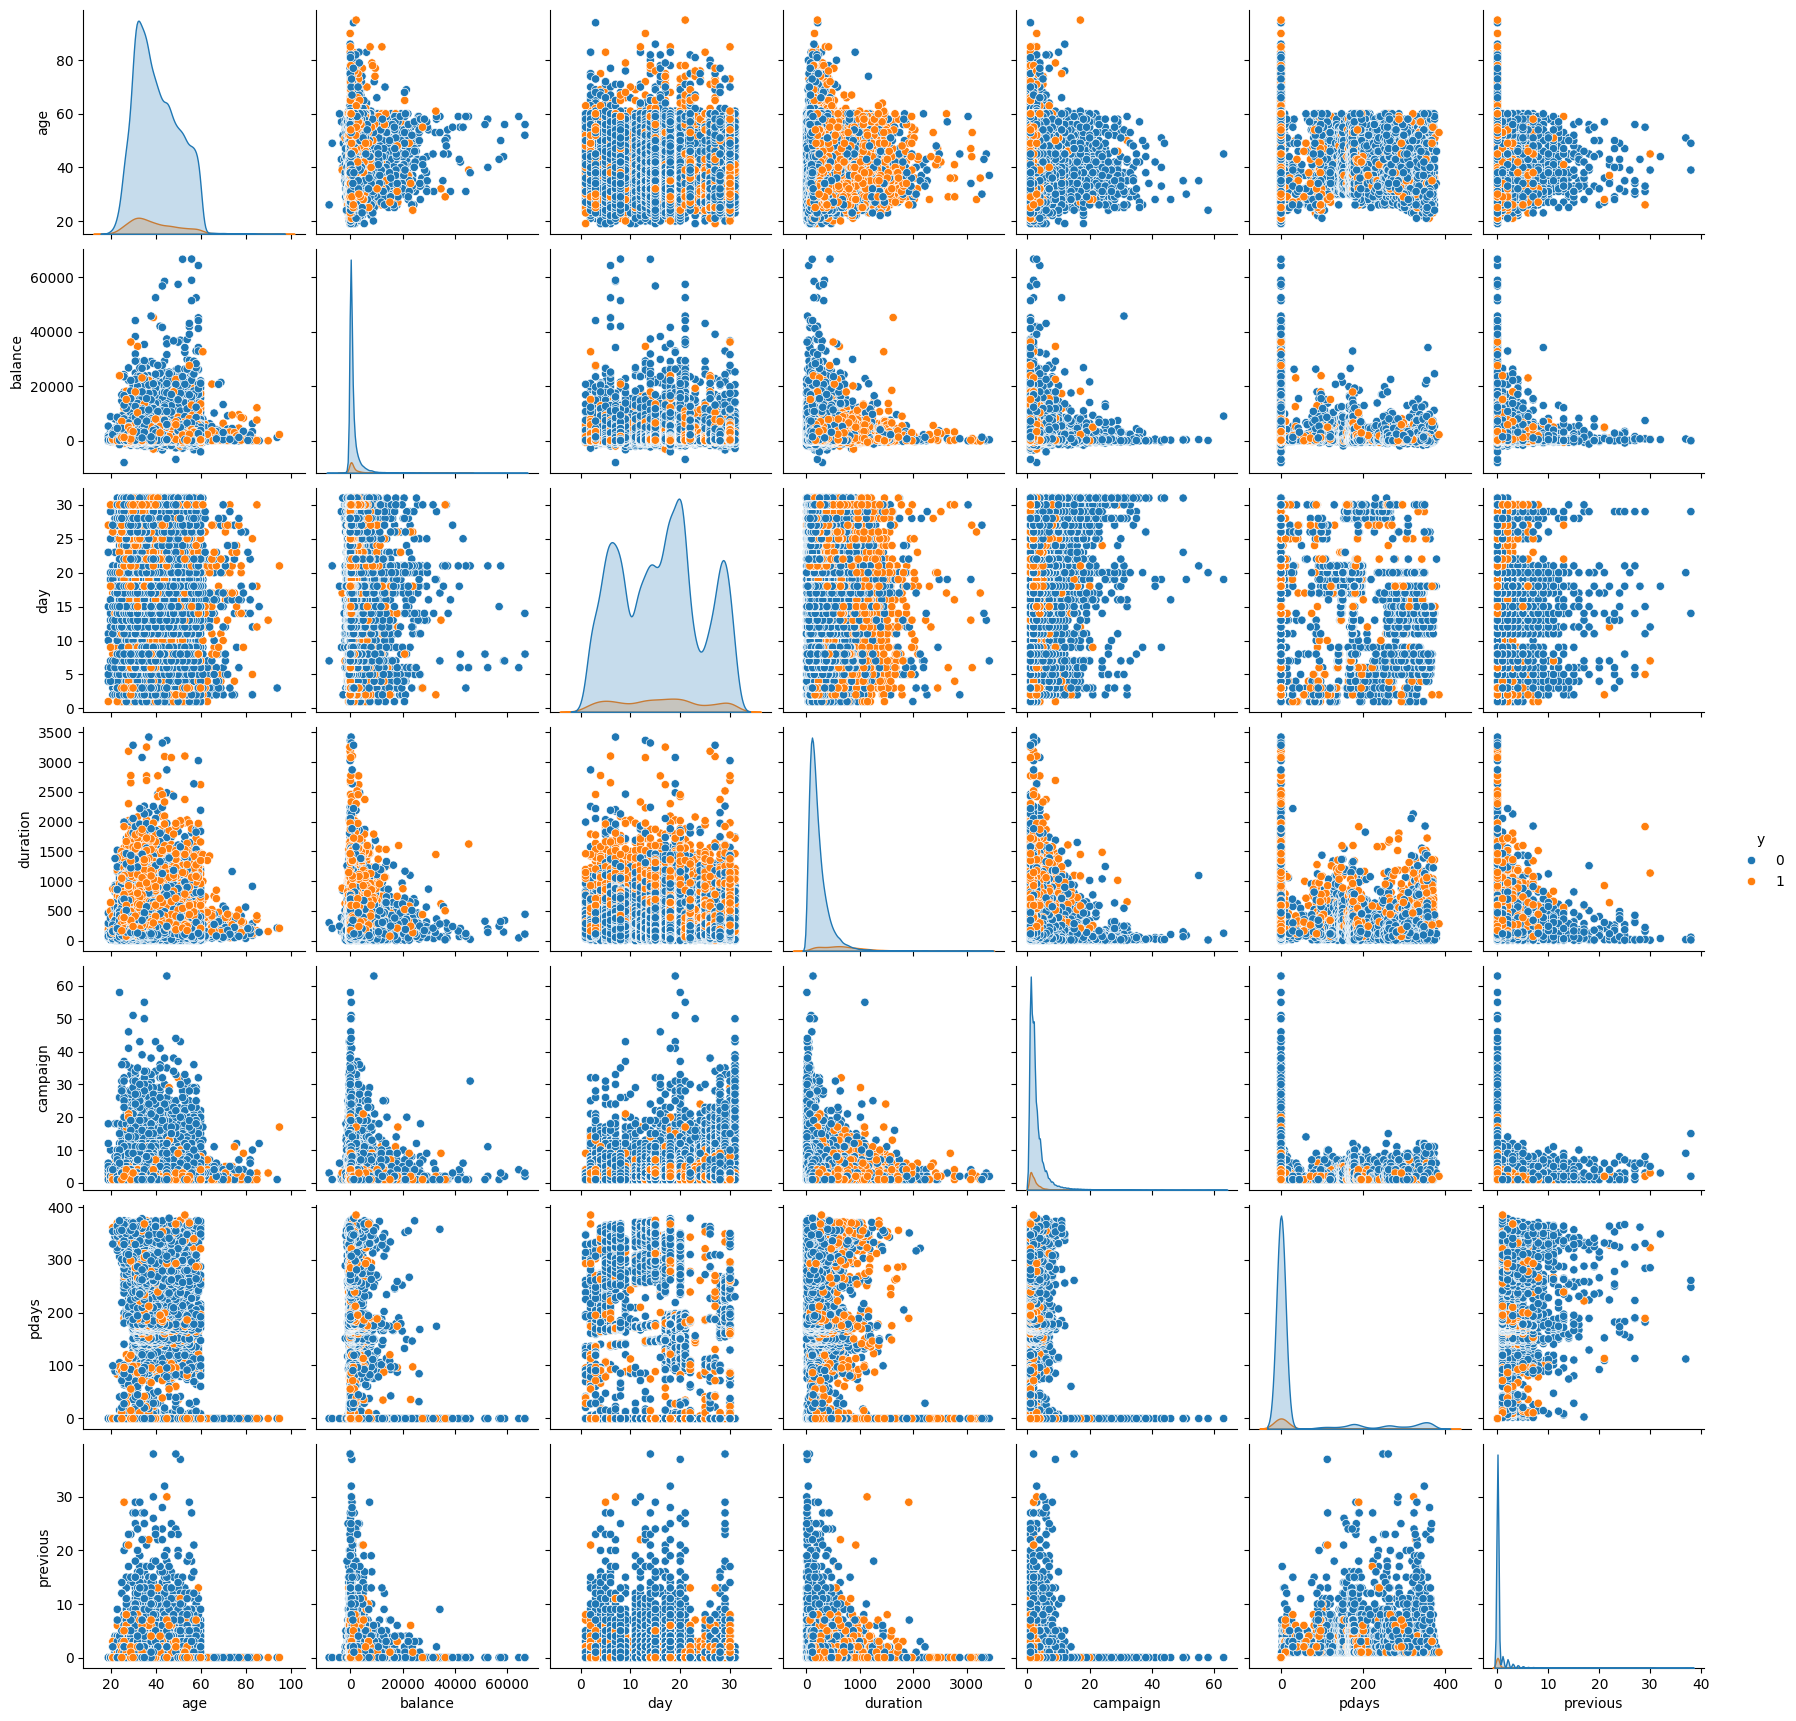

In [ ]:
num_col=['age','balance','day','duration','campaign','pdays','previous','y']
sns.pairplot(df_1[num_col],hue='y')

Based on pairplot and correlation plot, pdays and previous has a pretty high correlation to each other, duration has a pretty high correlation with the target variable, while the others are not

In [ ]:
num_to_scale=['age','day','campaign','balance','duration','pdays','previous']
scaler=StandardScaler()
df_1[num_to_scale]=scaler.fit_transform(df_1[num_to_scale])
df_1.shape

(39993, 17)

In [ ]:
x_features=df_1.drop(columns=['y'])
y_features=df_1['y']

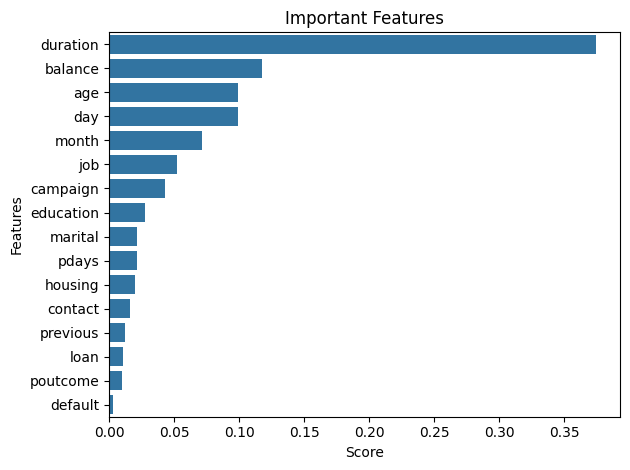

In [ ]:
feature_select=RandomForestClassifier()
feature_select.fit(x_features,y_features)
important=feature_select.feature_importances_
important_col = pd.Series(important, index=x_features.columns).sort_values(ascending=False)
sns.barplot(x=important_col, y=important_col.index)
plt.xlabel('Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.tight_layout()

**Keep** 10 important features/columns

In [ ]:
cols_to_keep = ['balance', 'age', 'day', 'month', 'job', 'campaign', 'education', 'marital', 'pdays',  'housing','y']
df_train=df_1[cols_to_keep]
df_train

,balance,age,day,month,job,campaign,education,marital,pdays,housing,y
0,0.310045,1.810721,-1.331015,8,4,-0.581078,2,1,-0.361821,1,0
1,-0.440086,0.358570,-1.331015,8,9,-0.581078,1,2,-0.361821,1,0
2,-0.449667,-0.782405,-1.331015,8,2,-0.581078,1,1,-0.361821,1,0
3,0.084012,0.669745,-1.331015,8,1,-0.581078,3,1,-0.361821,1,0
4,-0.450022,-0.782405,-1.331015,8,11,-0.581078,3,2,-0.361821,0,0
...,...,...,...,...,...,...,...,...,...,...,...
39995,-0.310215,1.292095,-1.572627,6,9,-0.581078,2,1,-0.361821,0,0
39996,0.734789,-1.093580,-1.572627,6,4,0.036350,2,2,-0.361821,0,1
39997,-0.379409,1.395820,-1.572627,6,0,-0.581078,1,0,-0.361821,0,1
39998,-0.078859,-0.678680,-1.572627,6,4,-0.581078,2,1,0.637745,0,0


**Handle** imbalanced data with SMOTE

In [ ]:
x=df_train.drop(columns=['y'])
y=df_train['y']

smote = SMOTE(sampling_strategy=0.7,random_state = 42)
balanced_train, balanced_y = smote.fit_resample(df_train, y)
balanced_train['y'].value_counts()

,count
y,
0,37099
1,25969


In [ ]:
x1=balanced_train.drop(columns=['y'])
y1=balanced_train['y']
x_train, x_val, y_train, y_val = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [ ]:
balanced_train

,balance,age,day,month,job,campaign,education,marital,pdays,housing,y
0,0.310045,1.810721,-1.331015,8,4,-0.581078,2,1,-0.361821,1,0
1,-0.440086,0.358570,-1.331015,8,9,-0.581078,1,2,-0.361821,1,0
2,-0.449667,-0.782405,-1.331015,8,2,-0.581078,1,1,-0.361821,1,0
3,0.084012,0.669745,-1.331015,8,1,-0.581078,3,1,-0.361821,1,0
4,-0.450022,-0.782405,-1.331015,8,11,-0.581078,3,2,-0.361821,0,0
...,...,...,...,...,...,...,...,...,...,...,...
63063,-0.107644,-0.605363,0.204046,9,1,-0.362865,1,1,-0.361821,0,1
63064,-0.194784,-0.681370,-1.496731,3,10,-0.581078,1,2,-0.361821,0,1
63065,-0.196682,-0.746060,-1.291777,3,0,0.329258,1,1,-0.361821,0,1
63066,-0.389071,-1.461564,-1.001679,0,0,-0.384451,1,1,-0.361821,0,1


# Model Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5,class_weight='balanced', random_state=42)

# Train model
model_rf.fit(x_train, y_train)

# Predict on validation data
y_pred = model_rf.predict(x_val)

In [ ]:
# Evaluate accuracy
f_score = f1_score(y_val, y_pred)
precision= precision_score(y_val,y_pred)
recall=recall_score(y_val,y_pred)
accuracy=accuracy_score(y_val,y_pred)
print(f"Validation F1 Score: {f_score:.2f}")
print(f"Validation Precision Score: {precision:.2f}")
print(f"Validation Recall: {recall:.2f}")
print(f"Validation Accuracy: {accuracy:.2f}")

Validation F1 Score: 0.70
Validation Precision Score: 0.72
Validation Recall: 0.69
Validation Accuracy: 0.76


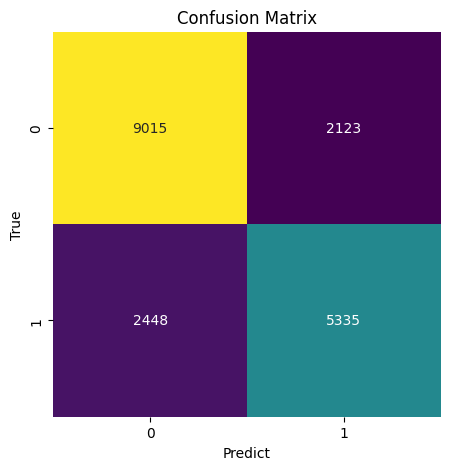

In [ ]:
matrix= confusion_matrix(y_val, y_pred)
plt.figure(figsize = (5, 5))
sns.heatmap(matrix, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel("Predict")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Model XGBoost

Validation F1 Score: 0.83
Validation Precision Score: 0.80
Validation Recall: 0.86
Validation Accuracy: 0.85


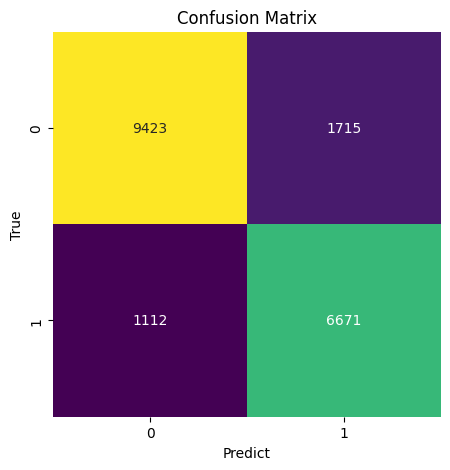

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.03,
    reg_lambda=2,
    reg_alpha=1,
    scale_pos_weight=len(y_train) / sum(y_train),
    subsample=0.8,
    colsample_bytree=0.8, # Handle imbalance
    random_state=42
)

# Train model
model.fit(x_train, y_train)

# Predict on validation data
y_pred = model.predict(x_val)

# Evaluate accuracy
f_score = f1_score(y_val, y_pred)
precision= precision_score(y_val,y_pred)
recall=recall_score(y_val,y_pred)
accuracy=accuracy_score(y_val,y_pred)
print(f"Validation F1 Score: {f_score:.2f}")
print(f"Validation Precision Score: {precision:.2f}")
print(f"Validation Recall: {recall:.2f}")
print(f"Validation Accuracy: {accuracy:.2f}")

matrix= confusion_matrix(y_val, y_pred)
plt.figure(figsize = (5, 5))
sns.heatmap(matrix, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel("Predict")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Testing Data

Use best model which is XGBoost

In [ ]:
df_test=pd.read_csv('bank-test.csv',delimiter=';')
id=df_test['id']
df_test.drop(columns='id',inplace=True)

In [ ]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,57,retired,married,secondary,no,718,no,no,cellular,3,jun,170,1,-1,0,unknown
1,50,management,married,secondary,no,268,no,no,cellular,3,jun,74,2,90,2,failure
2,46,technician,single,secondary,no,4367,yes,no,cellular,3,jun,65,1,96,1,failure
3,56,admin.,married,secondary,no,3554,no,no,cellular,3,jun,151,1,-1,0,unknown
4,32,services,single,tertiary,no,785,no,no,cellular,3,jun,273,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
5207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
5208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
5209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [ ]:
df_test['job']=df_test['job'].map(mapping_1).fillna(-1).astype(int)
df_test['marital']=df_test['marital'].map(mapping_2).fillna(-1).astype(int)
df_test['education']=df_test['education'].map(mapping_3).fillna(-1).astype(int)
df_test['default']=df_test['default'].map(mapping_4).fillna(-1).astype(int)
df_test['housing']=df_test['housing'].map(mapping_5).fillna(-1).astype(int)
df_test['loan']=df_test['loan'].map(mapping_6).fillna(-1).astype(int)
df_test['contact']=df_test['contact'].map(mapping_7).fillna(-1).astype(int)
df_test['month']=df_test['month'].map(mapping_8).fillna(-1).astype(int)
df_test['poutcome']=df_test['poutcome'].map(mapping_9).fillna(-1).astype(int)

num_to_scale=['age','day','campaign','balance','duration','pdays','previous']
df_test[num_to_scale]=scaler.transform(df_test[num_to_scale])
df_test.shape

cols_to_keep = ['balance', 'age', 'day', 'month', 'job', 'campaign', 'education', 'marital', 'pdays','housing']
df_2=df_test[cols_to_keep]
pred=model.predict(df_2)

In [ ]:
df_result = pd.DataFrame({"id": id, "y": pred})
df_result

,id,y
0,40100,1
1,40101,0
2,40102,0
3,40103,1
4,40104,1
...,...,...
5206,45306,0
5207,45307,1
5208,45308,1
5209,45309,0


In [ ]:
df_result = pd.DataFrame({"id": id, "y": pred})
df_result.to_csv('Nathanael_Jeshua_Paat-programming_1-ADIIP2025A.csv', index=False)

from google.colab import files
files.download('Nathanael_Jeshua_Paat-programming_1-ADIIP2025A.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>